# Importing Libraries

###### Here we import all the requirement libraries that are used for building the model.

In [5]:
#import pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing tensorflow
import tensorflow as tf
#importing keras from tensorflow
from tensorflow import keras
# importing Sequential from keras
from tensorflow.keras.models import Sequential
#importing Dense and Conv2D layers from keras
from tensorflow.keras.layers import Dense,Conv2D

# Fashion_MNIST dataset

Dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

In [6]:
df = tf.keras.datasets.fashion_mnist
# spliting the data into train and testing part
(train_df,train_labl),(test_df,test_labl) = df.load_data() 

In [38]:
df

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/nural/notebook/jupyterenv/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [7]:
(train_df,train_labl),(test_df,test_labl) = df.load_data() 

# Scaling data

In [8]:
#scaling the train data
train_df=train_df/255.0
#scaling test data
test_df = test_df/255.0

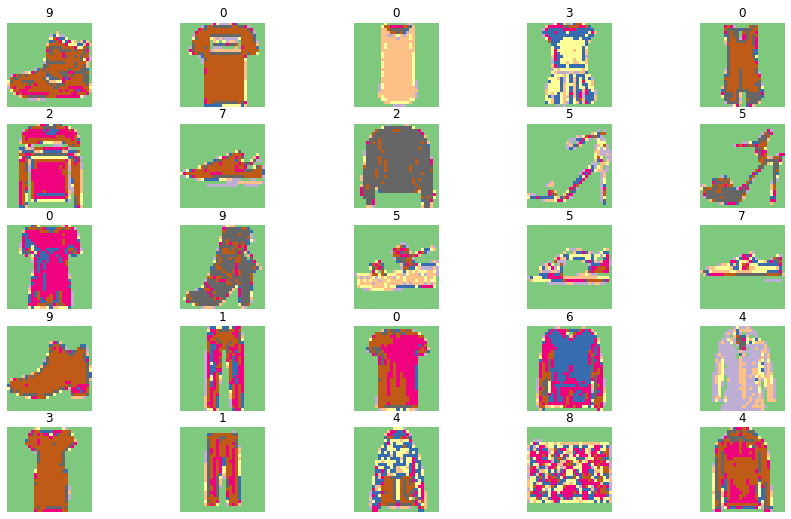

In [40]:
plt.figure(figsize=[15,9])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_df[i],cmap='Accent')
    plt.axis('off')
    plt.title(train_labl[i])

In [42]:
train_df[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
train_df[4].shape

(28, 28)

In [9]:
#rehaping the images into equal dim.

train_df = train_df.reshape(len(train_df),28,28,1)
test_df = test_df.reshape(len(test_df),28,28,1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D

In [11]:
#hypertuning of model
'''
def build_model(hp):
    model = Sequential([
        Conv2D(
        filters = hp.Int('units',min_value=32,max_value=128,step=16),#applying filter,
        kernel_size = hp.Choice('units',values=[3,5]),
        activation = 'relu',
        input_shape=(28,28,1)),
        
        Conv2D(
               filters = hp.Int('units',min_value=32,max_value=64,step=16),
               kernel_size=hp.Choice('units',values=[3,5]),
               activation='relu'),
               
        keras.layers.Flatten(),
        Dense(
            units=hp.Int('unit',min_value=16,max_value=128,step=16),
            activation='relu'),
        
        Dense(10,activation='softmax')        
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                   loss='sparsh_categorical_crossentropy',
                   matrics=['accuracy'])
    
    return model'''

def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(28,28,1)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(10, activation='softmax')
    ])
    
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model
   
    

In [12]:
#importing random search
from kerastuner import RandomSearch

#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5)

# search best parameter
tuner.search(train_df,train_labl,epochs=3,validation_data=(train_df,train_labl))

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner.search(train_df,train_labl,epochs=3,validation_data=(train_df,train_labl))

INFO:tensorflow:Oracle triggered exit


In [14]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        2496      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        55360     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                1486896   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 1,545,242
Trainable params: 1,545,242
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        2496      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        55360     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                1486896   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 1,545,242
Trainable params: 1,545,242
Non-trainable params: 0
_________________________________________________________________


In [15]:
h_object = model.fit(test_df,test_labl,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
282/282 [==============================] - 19s 64ms/step - loss: 0.2695 - accuracy: 0.9039 - val_loss: 0.2499 - val_accuracy: 0.9000
Epoch 5/10
282/282 [==============================] - 17s 61ms/step - loss: 0.1872 - accuracy: 0.9326 - val_loss: 0.2425 - val_accuracy: 0.9180
Epoch 6/10
282/282 [==============================] - 19s 67ms/step - loss: 0.1319 - accuracy: 0.9518 - val_loss: 0.2555 - val_accuracy: 0.9130
Epoch 7/10
282/282 [==============================] - 19s 67ms/step - loss: 0.0882 - accuracy: 0.9680 - val_loss: 0.3275 - val_accuracy: 0.8990
Epoch 8/10
282/282 [==============================] - 18s 63ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.3152 - val_accuracy: 0.9210
Epoch 9/10
282/282 [==============================] - 18s 63ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.4044 - val_accuracy: 0.8990
Epoch 10/10
282/282 [==============================] - 18s 63ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.4664 - val_accuracy

In [16]:
y_pred = model.predict(test_df)

In [13]:
y_pred[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
np.argmax(y_pred[0].round(2))

9

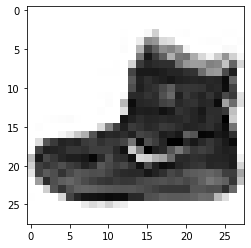

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_df[0],cmap='Greys')

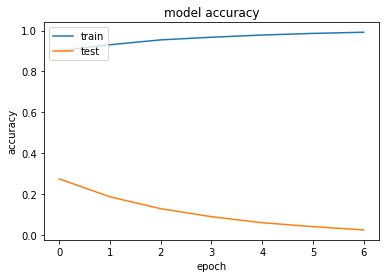

In [15]:
plt.plot(h_object.history['accuracy'])
plt.plot(h_object.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labl,[np.argmax(i) for i in y_pred])


<AxesSubplot:>

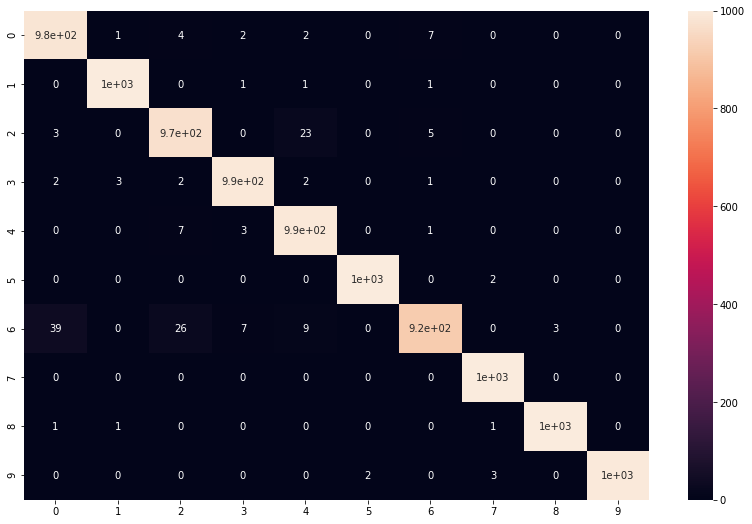

In [26]:
import seaborn as sb
plt.figure(figsize=[14,9])
sb.heatmap(cm,annot=True)

In [16]:
model.save('CNN_model')

INFO:tensorflow:Assets written to: CNN_model/assets
